Time series momentum focuses on the own past return of a particular asset . If this return is positive , asset will be bought 
and if it is negative asset will be shorted.

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

In [4]:
df=yf.download('AAPL',start='2022-08-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,159.703171,67829400
2022-08-02,160.100006,162.410004,159.630005,160.009995,158.219940,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,164.271469,82507500
2022-08-04,166.009995,167.190002,164.429993,165.809998,163.955078,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,163.727325,56697000
...,...,...,...,...,...,...
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [5]:
def strategy (df,window=1):
    df=df.copy()
    df['ret']=np.log(df.Close.pct_change()+1)
    df['prior_n']= df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i>0 else -1 for i in df.prior_n] 
    df['strat'] =df.position.shift(1)* df.ret
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

<Axes: xlabel='Date'>

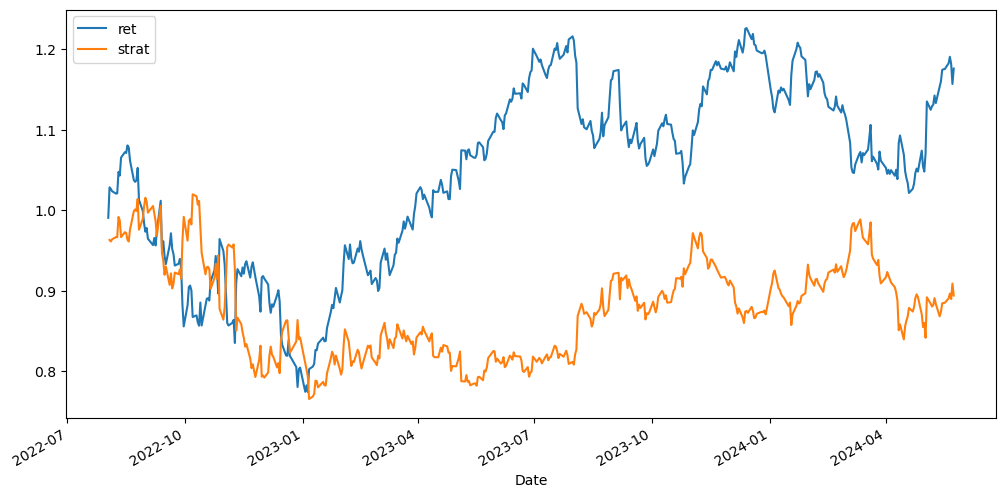

In [6]:
strategy(df)

in above the return is better than strategy

<Axes: xlabel='Date'>

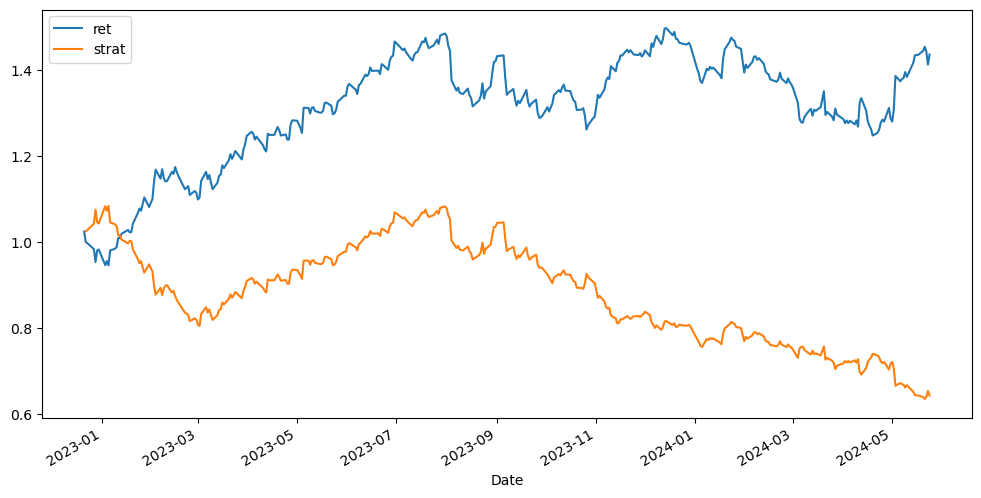

In [7]:
strategy(df,100)

Try fot other assets and play around

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

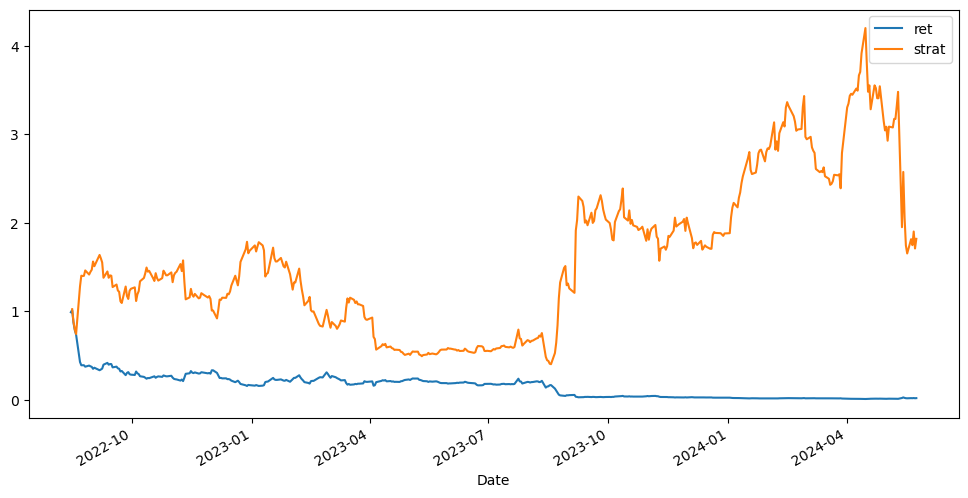

In [13]:
df=yf.download('AMC',start='2022-08-01')
def strategy (df,window=1):
    df=df.copy()
    df['ret']=np.log(df.Close.pct_change()+1)
    df['prior_n']= df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i>0 else -1 for i in df.prior_n] 
    df['strat'] =df.position.shift(1)* df.ret
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

strategy(df,10) # second paramter is the window here means no of days.


In above the strategy has performed better

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

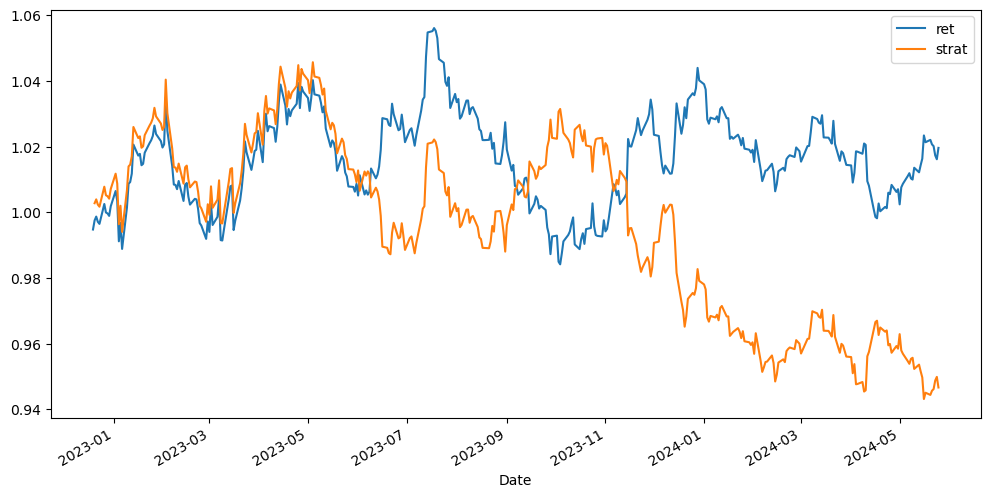

In [31]:
df=yf.download('EURUSD=X',start='2022-08-01')
# def strategy (df,window=1):
#     df=df.copy()
#     df['ret']=np.log(df.Close.pct_change()+1)
#     df['prior_n']= df.ret.rolling(window).sum()
#     df.dropna(inplace=True)
#     df['position'] = [1 if i>0 else -1 for i in df.prior_n] 
#     df['strat'] =df.position.shift(1)* df.ret
#     return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

strategy(df,100) # second paramter is the window here means no of da

In [19]:
#Intraday

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

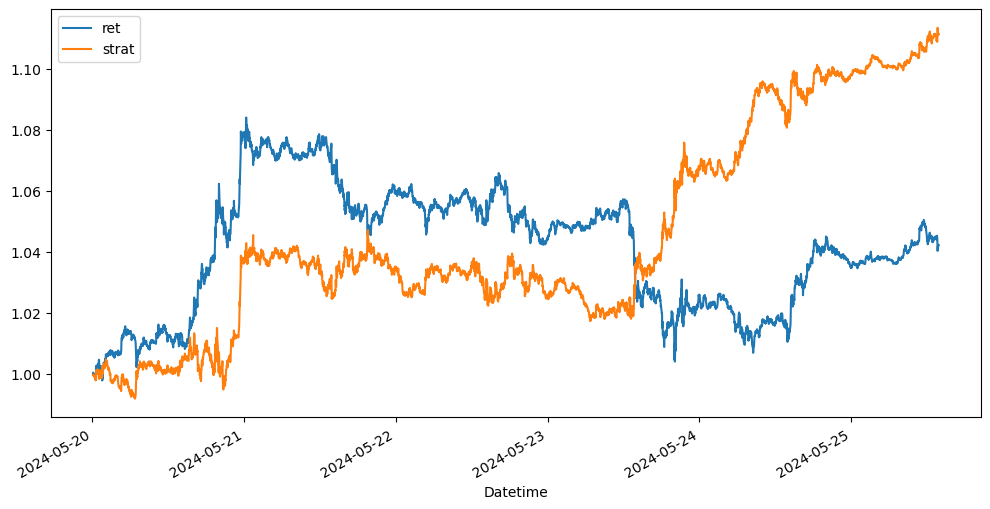

In [32]:
df1=yf.download('BTC-USD',start='2024-05-20',interval='1m',) #for 1 minute interval , date has to be from last 7 days.



strategy(df1,5) # second paramter is the window here means no of da

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

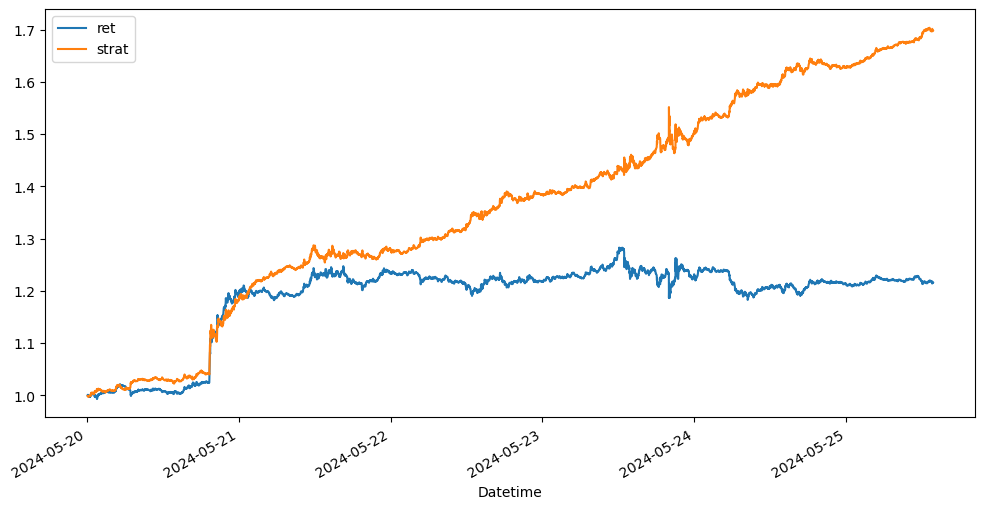

In [33]:
df1=yf.download('ETH-USD',start='2024-05-20',interval='1m',) #for 1 minute interval , date has to be from last 7 days.



strategy(df1,5) # second paramter is the window here means no of minutes here

In [ ]:
# https://www.youtube.com/watch?v=wIfjERirYZk&list=PL9ATnizYJ7f9pCPBzr-isv0_R3E6OW6YY&index=37